# Import train dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

mpl.rcParams['figure.figsize'] = (13, 13)

dataset = pd.read_csv('dota2Train.csv', header=None)

# Correlation Matrix

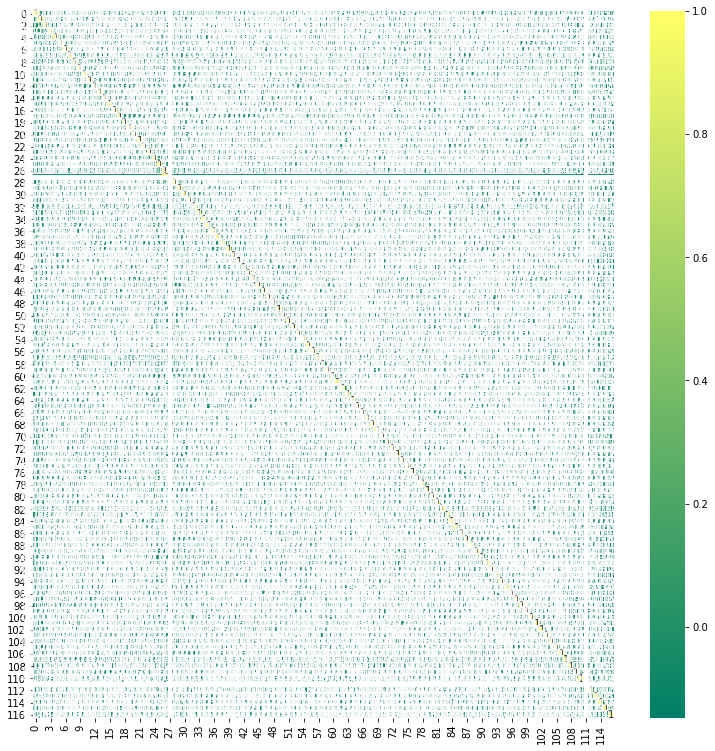

In [2]:
import seaborn as sns

def table_corr(df):
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.show()
    
table_corr(dataset)

# Get target and data features

Checking the correlation matrix, we can see that columns 1,2,3 doesnt affect our model in a good way.

In [3]:
X_train = dataset.iloc[0:, 4:]
y_train = dataset.iloc[:, 0]

# Import test dataset

In [4]:
test_dataset = pd.read_csv('dota2Test.csv', header=None)
X_test = dataset.iloc[0:, 4:]
y_test = dataset.iloc[:, 0]

# KNN

## Calculate best number of neighbors

In [ ]:
n = np.arange(1,9)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

for i, k in enumerate(n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot of overfitting and underfitting
plt.title('k-NN accuracy: Varying Number of Neighbors')
plt.plot(n, test_accuracy, label = 'Testing Accuracy')
plt.plot(n, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Prediction

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, pred)
print(acc_knn)

0.677625472207


# Naive bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

In [8]:
acc = accuracy_score(y_test, pred)
print(acc)

0.572951969779
